In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikitabisht/menstrual-cycle-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nikitabisht/menstrual-cycle-data/versions/1


In [ ]:
import os
files=os.listdir(path)
for f in files:
  if f.endswith('.csv'):
    csv_path=os.path.join(path,f)
    df=pd.read_csv(csv_path)

In [ ]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [ ]:
features=[
    'LengthofCycle','MeanCycleLength','EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'TotalDaysofFertility',
    'TotalMensesScore', 'MeanBleedingIntensity', 'MensesScoreDayOne' ,'MensesScoreDaySeven', 'UnusualBleeding',
    'BMI', 'Weight', 'Height', 'Age', 'Numberpreg', 'Breastfeeding', 'Medvits',
    'NumberofDaysofIntercourse', 'IntercourseInFertileWindow'
    ]

In [ ]:
df[features].isna().sum()

,0
LengthofCycle,0
MeanCycleLength,0
EstimatedDayofOvulation,0
LengthofLutealPhase,0
LengthofMenses,0
TotalDaysofFertility,0
TotalMensesScore,0
MeanBleedingIntensity,0
MensesScoreDayOne,0
MensesScoreDaySeven,0


In [ ]:
df=df[features]

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LengthofCycle               1665 non-null   int64  
 1   MeanCycleLength             141 non-null    float64
 2   EstimatedDayofOvulation     1515 non-null   float64
 3   LengthofLutealPhase         1514 non-null   float64
 4   LengthofMenses              1661 non-null   float64
 5   TotalDaysofFertility        1634 non-null   float64
 6   TotalMensesScore            1661 non-null   float64
 7   MeanBleedingIntensity       110 non-null    float64
 8   MensesScoreDayOne           1661 non-null   float64
 9   MensesScoreDaySeven         224 non-null    float64
 10  UnusualBleeding             1645 non-null   float64
 11  BMI                         131 non-null    float64
 12  Weight                      134 non-null    float64
 13  Height                      133 n

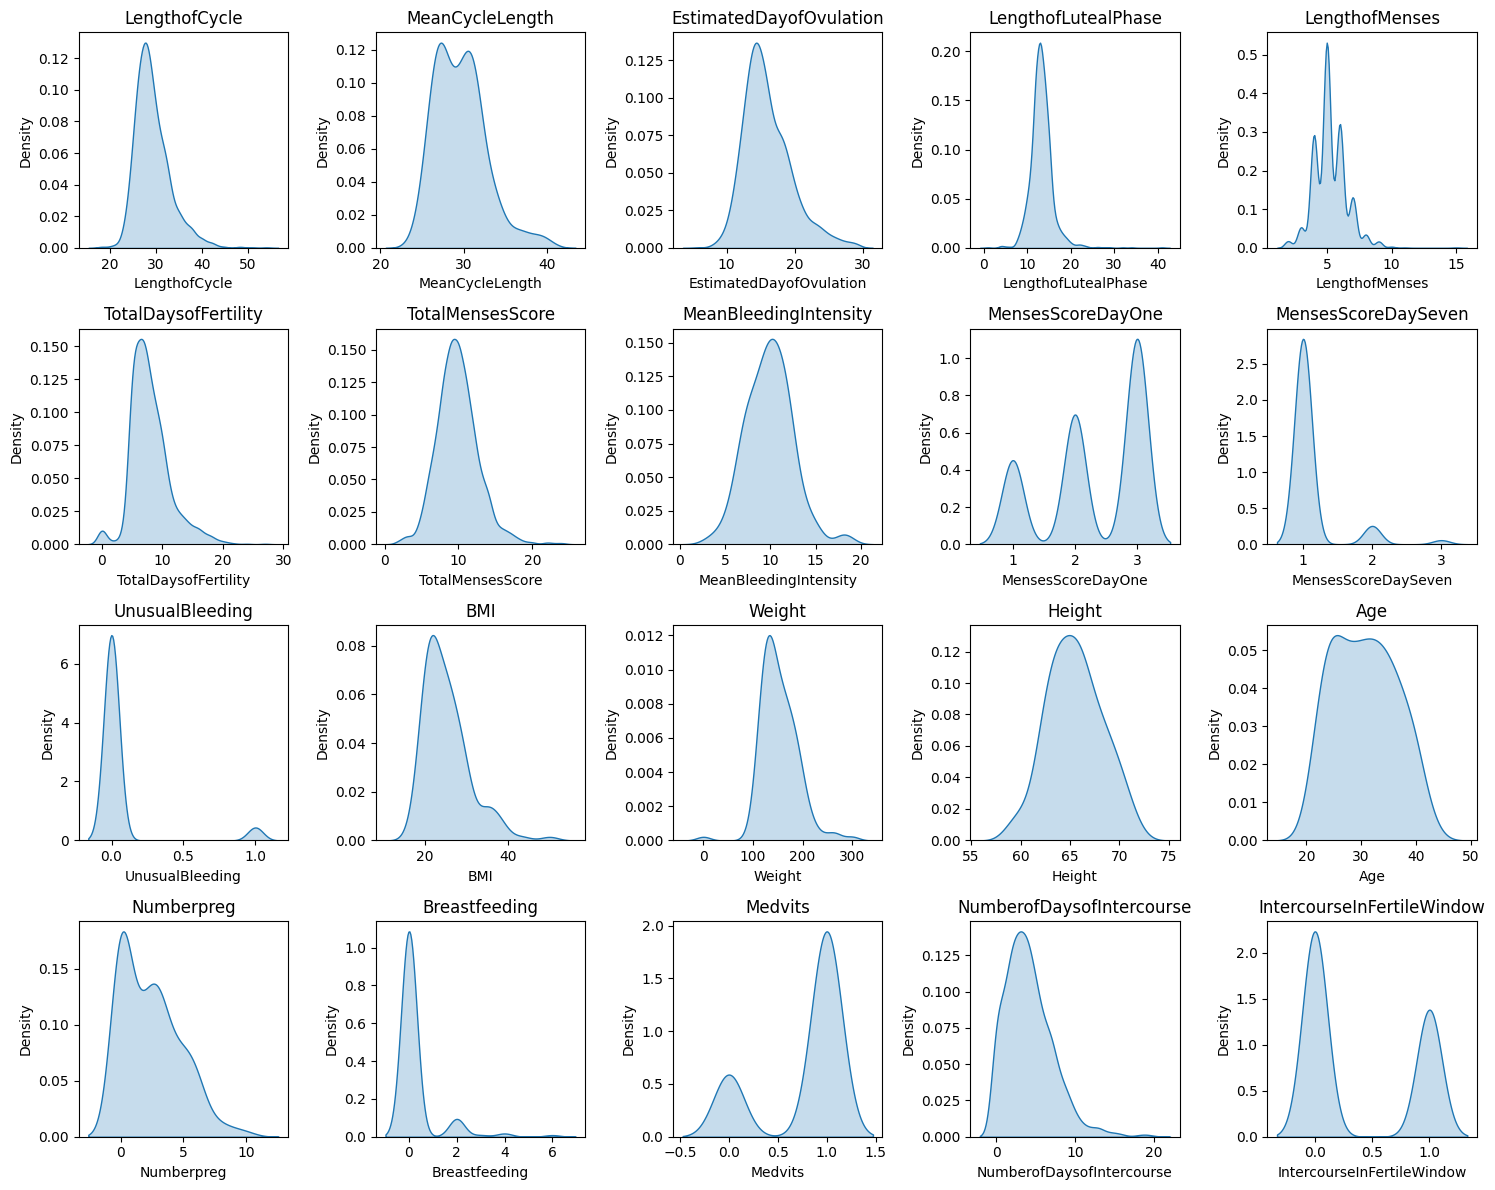

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 5x5 grid
axes = axes.flatten()

for i, column in enumerate(df.columns):  # Ensure max 20 plots
    sns.kdeplot(df[column], fill=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# normalize the data because LSTM works better on scaled data
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df)
# convert back to dataframe
df = pd.DataFrame(scaled_df, columns=features)

In [ ]:
# splitting the data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

**ARIMA Model**

In [ ]:
cycle_len=df['LengthofCycle']
print("Cycle Data Length:", len(cycle_len))
print("Cycle Data Sample:\n", cycle_len.head())

Cycle Data Length: 1665
Cycle Data Sample:
 0    29
1    27
2    29
3    27
4    28
Name: LengthofCycle, dtype: int64


In [ ]:
df.head()

,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,TotalDaysofFertility,TotalMensesScore,MeanBleedingIntensity,MensesScoreDayOne,MensesScoreDaySeven,UnusualBleeding,BMI,Weight,Height,Age,Numberpreg,Breastfeeding,Medvits,NumberofDaysofIntercourse,IntercourseInFertileWindow
0,0.305556,0.208125,0.478261,0.275,0.230769,0.333333,0.363636,0.380667,1.0,NaN,0.0,0.133817,0.4,0.307692,0.681818,0.3,0.0,0.0,0.25,1.0
1,0.250000,NaN,0.391304,0.275,0.230769,0.222222,0.363636,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,1.0
2,0.305556,NaN,0.391304,0.325,0.230769,0.185185,0.363636,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0
3,0.250000,NaN,0.391304,0.275,0.230769,0.222222,0.454545,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,0.0
4,0.277778,NaN,0.434783,0.275,0.230769,0.296296,0.409091,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0


In [ ]:
df[["LengthofCycle"]] = scaler.fit_transform(df[["LengthofCycle"]])
cycle_len = scaler.inverse_transform(df[["LengthofCycle"]])[:, 0]
cycle_len=pd.Series(cycle_len)

In [ ]:
print("Cycle Data Type:", type(cycle_len))

Cycle Data Type: <class 'pandas.core.series.Series'>


In [ ]:
!pip install numpy==1.24

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
cycle_len=df['LengthofCycle'].dropna()
auto_arima_model = auto_arima(cycle_len, seasonal=False, stepwise=True)
arima_model=ARIMA(cycle_len,order=auto_arima_model.order)
arima_fit=arima_model.fit()
arima_pred=arima_fit.forecast(steps=1).iloc[0]
print("ARIMA Predicted Cycle Length:",arima_pred," days")

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

ARIMA Predicted Cycle Length: 29.7847978116829  days


In [ ]:
import joblib
joblib.dump(arima_fit, 'arima_model.pkl')

['arima_model.pkl']

**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM ,Dropout

In [ ]:
# creating sequence for LSTM
def create_seq(data,seq_len=5):
  X,y=[],[]
  for i in range(len(data)-seq_len):
    X.append(data[i:i+seq_len])
    y.append(data[i+seq_len,0])
  return np.array(X),np.array(y)

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
seq_len=5 #number of past cycles for prediction
x_data,y_data=create_seq(df.values,seq_len)
# splitting the data
train_size=int(len(x_data)*0.8)
x_train,y_train=x_data[:train_size],y_data[:train_size]
x_test,y_test=x_data[train_size:],y_data[train_size:]

In [ ]:
# building the LSTM model
LSTM_model=Sequential([
    LSTM(64,activation='tanh',return_sequences=True,input_shape=(seq_len,x_train.shape[2])),
    Dropout(0.3),
    LSTM(32,activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
LSTM_model.compile(optimizer='adam',loss='mse')
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=10,validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 692.4486 - val_loss: 429.6518
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 365.1851 - val_loss: 297.5668
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 250.0830 - val_loss: 205.6670
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 176.6997 - val_loss: 140.6076
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 119.1373 - val_loss: 95.6369
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 82.0318 - val_loss: 65.1572
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 52.6042 - val_loss: 45.8319
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.2014 - val_loss: 33.4513
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 31.8504 - val_loss: 25.9353
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25.1371 - val_loss: 21.4626
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.0634 - val_loss: 18.9055
Epoch 12

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
print("X_test shape:", x_test.shape)
print("Last test input (X_test[-1]):", x_test[-1])  # Print the actual input data
print("Contains NaN:", np.isnan(x_test[-1]).any())

X_test shape: (332, 5, 20)
Last test input (X_test[-1]): [[0.38888889 0.34375    0.56521739 0.3        0.38461538 0.2962963
  0.45454545 0.44066667 0.5        0.         0.         0.2209651
  0.485      0.46153846 0.43181818 0.2        0.         1.
  0.45       1.        ]
 [0.30555556 0.34375    0.56521739 0.225      0.46153846 0.37037037
  0.59090909 0.44066667 0.5        0.         1.         0.2209651
  0.485      0.46153846 0.43181818 0.2        0.         1.
  0.4        0.        ]
 [0.27777778 0.34375    0.47826087 0.25       0.30769231 0.33333333
  0.40909091 0.44066667 1.         0.         0.         0.2209651
  0.485      0.46153846 0.43181818 0.2        0.         1.
  0.55       1.        ]
 [0.27777778 0.34375    0.43478261 0.275      0.23076923 0.33333333
  0.31818182 0.44066667 1.         0.         0.         0.2209651
  0.485      0.46153846 0.43181818 0.2        0.         1.
  0.35       0.        ]
 [0.61111111 0.34375    0.91304348 0.3        0.30769231 0.25925

In [ ]:
LSTM_input = np.expand_dims(x_test[-1], axis=0)
LSTM_prediction = LSTM_model.predict(LSTM_input)[0][0]

# Convert back to original scale
# LSTM_prediction = scaler.inverse_transform([[LSTM_prediction] + [0] * (df.shape[1]-1)])[0][0]
print(f"LSTM Predicted Cycle Length:", LSTM_prediction," days")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
LSTM Predicted Cycle Length: 31.804785  days


In [ ]:
LSTM_model.save('LSTM_model.keras')

**Huber and Lasso Reggresion Model**

In [ ]:
from sklearn.linear_model import HuberRegressor,Lasso,OrthogonalMatchingPursuit
x_reg=df.drop(columns=["LengthofCycle"]).values
y_reg=df["LengthofCycle"].values

In [ ]:
huber=HuberRegressor().fit(x_reg,y_reg)
huber_prediction=huber.predict([x_reg[-1]])[0]
print("Huber Predicted Cycle Length ",huber_prediction," days")

Huber Predicted Cycle Length  27.9882118802725  days


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
lasso=Lasso(alpha=0.02).fit(x_reg,y_reg)
lasso_prediction=lasso.predict([x_reg[-1]])[0]
print("Lasso Predicted Cycle Length ",lasso_prediction," days")

Lasso Predicted Cycle Length  28.204950609174187  days


In [ ]:
omp=OrthogonalMatchingPursuit().fit(x_reg,y_reg)
omp_prediction=huber.predict([x_reg[-1]])[0]
print("OMP Predicted Cycle Length ",omp_prediction," days")

OMP Predicted Cycle Length  27.9882118802725  days


In [ ]:
FINAL_PRED=(
    0.4*arima_pred+
    0.4*LSTM_prediction+
    0.3*huber_prediction+
    0.2*lasso_prediction+
    0.1*omp_prediction
)
print("FINAL Predicted Cycle Length ",FINAL_PRED," days")

FINAL Predicted Cycle Length  29.182231898740444  days


In [ ]:
from sklearn.metrics import mean_absolute_error
actual_values = y_test
predicted_values = []
for i in range(len(x_test)):
    lstm_pred = LSTM_model.predict(np.expand_dims(x_test[i], axis=0))[0][0]
    lstm_pred = scaler.inverse_transform([[lstm_pred]])[0][0]

    arima_pred = arima_fit.forecast(steps=1).iloc[0]

    # Correctly extract 19 features for Huber, LASSO, and OMP
    flat_features = x_test[i][-1, :19]

    huber_pred = huber.predict([flat_features])[0]
    lasso_pred = lasso.predict([flat_features])[0]
    omp_pred = omp.predict([flat_features])[0]

    final_pred = (
        0.4 * arima_pred +
        0.4 * lstm_pred +
        0.2 * huber_pred +
        0.1 * lasso_pred +
        0.1 * omp_pred
    )

    print(f"Final Predicted Cycle Length: {final_pred:.2f} days")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Final Predicted Cycle Length: 30.11 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Final Predicted Cycle Length: 30.58 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Final Predicted Cycle Length: 30.49 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Final Predicted Cycle Length: 31.27 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Final Predicted Cycle Length: 32.10 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Final Predicted Cycle Length: 31.16 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Final Predicted Cycle Length: 31.50 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Final Predicted Cycle Length: 33.53 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Final Predicted Cycle Length: 29.54 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Final Predicted Cycle Length: 30.34 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Final Predicted Cycle Length: 33.06 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Final Predicted Cycle Length: 33.07 days
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Final Predicte

In [ ]:
import joblib

# Save individual models
joblib.dump(arima_model, 'arima_model.pkl')
joblib.dump(LSTM_model, 'lstm_model.pkl')
joblib.dump(huber, 'huber_model.pkl')
joblib.dump(lasso, 'lasso_model.pkl')
joblib.dump(omp, 'omp_model.pkl')

# Download models
from google.colab import files
files.download('arima_model.pkl')
files.download('lstm_model.pkl')
files.download('huber_model.pkl')
files.download('lasso_model.pkl')
files.download('omp_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(LSTM_model, 'lstm_model.h5')
files.download('lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from datetime import datetime

user_data=[38,35,37,40,36]
last_period_date = "2025-02-19"

In [ ]:
user_cycles = np.array([38,35,37,40,36])
extra_features = np.zeros((5, 19))  # 5 time steps with 19 extra features
user_data_scaled = np.hstack((user_cycles.reshape(-1, 1), extra_features))
user_data_scaled = np.expand_dims(user_data_scaled, axis=0)

In [ ]:
lstm_pred = LSTM_model.predict(user_data_scaled)[0][0]
lstm_pred = scaler.inverse_transform([[lstm_pred]])[0][0]
arima_pred = arima_fit.forecast(steps=1).iloc[0]
#flat_features = np.array(user_data).reshape(1, -1)  # Flatten for regression models

flat_features = np.concatenate((user_cycles, missing_features))  # Shape: (19,)
flat_features = flat_features.reshape(1, -1)

huber_pred = huber.predict(flat_features)[0]
lasso_pred = lasso.predict(flat_features)[0]
omp_pred = omp.predict(flat_features)[0]

# Convert regression predictions back to original scale
huber_pred = scaler.inverse_transform([[huber_pred]])[0][0]
lasso_pred = scaler.inverse_transform([[lasso_pred]])[0][0]
omp_pred = scaler.inverse_transform([[omp_pred]])[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
